## Title

# Exploratory Data Analysis

### Description:

In this notebook we will have a first look to the initial dataset, join them in order to work with the full dataset. Next we will perform the Exploratory Data Analysis in order to look up for insights.

### Authors:

#### Hugo Cesar Octavio del Sueldo¶
#### Jose Lopez Galdon

### Date:
15/01/2021
### Version:¶
1.0

## Load pySpark

First of all, we will create the sparkContext and we will create the RDD from our files downloaded from the official website.

In [36]:
    # Findspark to locate the spark in the system
#import findspark
#findspark.init()

    # Initialize the spark context
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

    # Due to we are going to work with sparkSQL we will introduce the sparksql context
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, explode
from pyspark.sql.functions import *
spark = SparkSession.builder.master("local[*]").getOrCreate()

    # Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

Now, we will create objects with the file path

In [4]:
data_movies = "../data/01_raw/movies.csv"
data_ratings = "../data/01_raw/ratings.csv"

### Movies dataset

**`spark.read`**: It is necesary to load the csv file.
- format("csv"): Means the format of the file.

- option("sep", ","): It establish the kind of spearator, in this case ','.

- option("inferSchema", "true"): We set spark to infer the type of schema.

- option("header", "true"): We say to spark that the file has a header.

- load(f'{datos_movies}'): Path file.

This code was written in Scala.

In [5]:
raw_movies = spark.read.format("csv") \
                    .option("sep", ",") \
                    .option("inferSchema", "true") \
                    .option("header", "true") \
                    .load(f'{data_movies}')
print(type(raw_movies))

<class 'pyspark.sql.dataframe.DataFrame'>


#### View data

Now we have our data file loaded into the raw_movies DataFrame.

Without getting into *Spark transformations and actions*, the most basic thing we can do to check that we got our DF contents right is to check the first few entries in our data. We can also count() the number of lines loaded from the file into the DF.

In [6]:
     # The first 5 observations with take function
raw_movies.take(5)

[Row(movieId=1, title='Toy Story (1995)', genres='Adventure|Animation|Children|Comedy|Fantasy'),
 Row(movieId=2, title='Jumanji (1995)', genres='Adventure|Children|Fantasy'),
 Row(movieId=3, title='Grumpier Old Men (1995)', genres='Comedy|Romance'),
 Row(movieId=4, title='Waiting to Exhale (1995)', genres='Comedy|Drama|Romance'),
 Row(movieId=5, title='Father of the Bride Part II (1995)', genres='Comedy')]

In [7]:
     # Count the number of observation
raw_movies.count()

58098

To see the result in more interactive manner (rows under the columns), we can use the show operation

In [8]:
raw_movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [9]:
    # Show the schema
raw_movies.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



As we can see, it shows us each column (by name, according to the file header) and its type.

### Ratings dataset

**`spark.read`**: It is necesary to load the csv file.
- format("csv"): Means the format of the file.

- option("sep", ","): It establish the kind of spearator, in this case ','.

- option("inferSchema", "true"): We set spark to infer the type of schema.

- option("header", "true"): We say to spark that the file has a header.

- load(f'{datos_movies}'): Path file.

This code was written in Scala.

In [10]:
raw_ratings = spark.read.format("csv") \
                    .option("sep", ",") \
                    .option("inferSchema", "true") \
                    .option("header", "true") \
                    .load(f'{data_ratings}')
print(type(raw_ratings))

<class 'pyspark.sql.dataframe.DataFrame'>


#### View data

In [11]:
    # The first 5 observations with take function
raw_ratings.take(5)

[Row(userId=1, movieId=307, rating=3.5, timestamp=1256677221),
 Row(userId=1, movieId=481, rating=3.5, timestamp=1256677456),
 Row(userId=1, movieId=1091, rating=1.5, timestamp=1256677471),
 Row(userId=1, movieId=1257, rating=4.5, timestamp=1256677460),
 Row(userId=1, movieId=1449, rating=4.5, timestamp=1256677264)]

In [12]:
    # Count the number of observation
raw_ratings.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    307|   3.5|1256677221|
|     1|    481|   3.5|1256677456|
|     1|   1091|   1.5|1256677471|
|     1|   1257|   4.5|1256677460|
|     1|   1449|   4.5|1256677264|
|     1|   1590|   2.5|1256677236|
|     1|   1591|   1.5|1256677475|
|     1|   2134|   4.5|1256677464|
|     1|   2478|   4.0|1256677239|
|     1|   2840|   3.0|1256677500|
|     1|   2986|   2.5|1256677496|
|     1|   3020|   4.0|1256677260|
|     1|   3424|   4.5|1256677444|
|     1|   3698|   3.5|1256677243|
|     1|   3826|   2.0|1256677210|
|     1|   3893|   3.5|1256677486|
|     2|    170|   3.5|1192913581|
|     2|    849|   3.5|1192913537|
|     2|   1186|   3.5|1192913611|
|     2|   1235|   3.0|1192913585|
+------+-------+------+----------+
only showing top 20 rows



In [13]:
    # Show the schema 
raw_ratings.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [14]:
     # Count the number of observation    
raw_ratings.count()

27753444

### Join datasets

In order to continue with the exploration, we will merge both datasets.

In [15]:
    # Join both the data frames to add movie data into ratings
movie_ratings = raw_ratings.join(other=raw_movies, on=["movieId"], how="left")

As we can see above, we have our new dataset ready to perform the EDA.

***

***

## EDA

In this part, we will perform the EDA, so we can see more details of these dataset. First of all, we will look up the first and last rows, get the data shape, schema, dictionary of the variables... Also we will study if we have to drop some variables, study NaN and duplicated data.

### Dictionary

- `movieId`: Identification number for the movie.
- `userId`: Identification number for the user.
- `rarting`: Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
- `timestamp`: Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
- `title`: Title and year of the movie.
- `genres`: Genres are a pipe-separated list.

### Data structure

In [16]:
    # Show the dataset
movie_ratings.show()

+-------+------+------+----------+--------------------+--------------------+
|movieId|userId|rating| timestamp|               title|              genres|
+-------+------+------+----------+--------------------+--------------------+
|    307|     1|   3.5|1256677221|Three Colors: Blu...|               Drama|
|    481|     1|   3.5|1256677456|   Kalifornia (1993)|      Drama|Thriller|
|   1091|     1|   1.5|1256677471|Weekend at Bernie...|              Comedy|
|   1257|     1|   4.5|1256677460|Better Off Dead.....|      Comedy|Romance|
|   1449|     1|   4.5|1256677264|Waiting for Guffm...|              Comedy|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)|Horror|Sci-Fi|Thr...|
|   1591|     1|   1.5|1256677475|        Spawn (1997)|Action|Adventure|...|
|   2134|     1|   4.5|1256677464|Weird Science (1985)|Comedy|Fantasy|Sc...|
|   2478|     1|   4.0|1256677239|¡Three Amigos! (1...|      Comedy|Western|
|   2840|     1|   3.0|1256677500|     Stigmata (1999)|      Drama|Thriller|

Here we can see the first 20 rows of our dataset. Genre column has various genres associated with that movie but we need to process on each genre separately and hence we will split the genre with the ‘|’ operator and then use explode so that every distinct genre will be in their own row. This will ignore null or empty genres if present in the dataset and if for some reason you want them to persist then you can go for explode_outer as it will also store null or empty values.

We will create a schema to ensure that each column has the desired data type as we need. 

In [17]:
    # Show the schema
movie_ratings.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



In [18]:
    # Another way to see the column names
movie_ratings.columns

['movieId', 'userId', 'rating', 'timestamp', 'title', 'genres']

In [19]:
    # Data shape
movie_ratings.count()

27753444

### Split genre column

In [20]:
df_genres_split = movie_ratings.withColumn("genres", explode(split("genres", "[|]")))
df_genres_split.show()

+-------+------+------+----------+--------------------+---------+
|movieId|userId|rating| timestamp|               title|   genres|
+-------+------+------+----------+--------------------+---------+
|    307|     1|   3.5|1256677221|Three Colors: Blu...|    Drama|
|    481|     1|   3.5|1256677456|   Kalifornia (1993)|    Drama|
|    481|     1|   3.5|1256677456|   Kalifornia (1993)| Thriller|
|   1091|     1|   1.5|1256677471|Weekend at Bernie...|   Comedy|
|   1257|     1|   4.5|1256677460|Better Off Dead.....|   Comedy|
|   1257|     1|   4.5|1256677460|Better Off Dead.....|  Romance|
|   1449|     1|   4.5|1256677264|Waiting for Guffm...|   Comedy|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)|   Horror|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)|   Sci-Fi|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)| Thriller|
|   1591|     1|   1.5|1256677475|        Spawn (1997)|   Action|
|   1591|     1|   1.5|1256677475|        Spawn (1997)|Adventure|
|   1591| 

First, we have to understand how withColumn works, withColumn is used to create a new column in the dataframe with some condition or just populating constant values. If column exists already as in this case (genre column) we can populate it with some condition passed alongside it.

Once we have the data in the correct we can show which of the genres is the most popular.

In [21]:
df_genres_split.groupBy("genres").count().sort("count").show()

+------------------+--------+
|            genres|   count|
+------------------+--------+
|(no genres listed)|   18389|
|         Film-Noir|  272742|
|       Documentary|  345471|
|           Western|  542424|
|              IMAX| 1102179|
|           Musical| 1109674|
|               War| 1426112|
|         Animation| 1803041|
|            Horror| 2070791|
|           Mystery| 2210388|
|          Children| 2381124|
|           Fantasy| 3118549|
|             Crime| 4631581|
|            Sci-Fi| 4740208|
|           Romance| 5078478|
|         Adventure| 6452309|
|          Thriller| 7489628|
|            Action| 8214956|
|            Comedy| 9999184|
|             Drama|12191048|
+------------------+--------+



We can see that we have 18389 movies with '(no genres listed)', also we can see that the most common genre is Drama, follow by Comedy and Action. 

For further information we will explore those movies without genres listed:

In [22]:
df_genres_split.filter(df_genres_split.genres == "(no genres listed)").show()

+-------+------+------+----------+--------------------+------------------+
|movieId|userId|rating| timestamp|               title|            genres|
+-------+------+------+----------+--------------------+------------------+
| 166024|    14|   4.5|1497536861|     Whiplash (2013)|(no genres listed)|
| 122896|    75|   1.5|1511888856|Pirates of the Ca...|(no genres listed)|
| 125958|   119|   5.0|1474471558|Stephen Fry In Am...|(no genres listed)|
| 138212|   134|   4.0|1485104419|     Spectral (2016)|(no genres listed)|
| 141866|   173|   3.5|1484060054|   Green Room (2015)|(no genres listed)|
| 130060|   176|   3.0|1499892811|Des fleurs pour A...|(no genres listed)|
| 147942|   176|   4.0|1535836533|       Room 8 (2013)|(no genres listed)|
| 155927|   176|   3.5|1499880225|    Vdrebezgi (2011)|(no genres listed)|
| 162290|   176|   2.0|1499891266|         Lift (2006)|(no genres listed)|
| 166562|   176|   4.5|1499893111|Panfilov's 28 Men...|(no genres listed)|
| 179111|   214|   4.0|15

There some of these films thath are known as *Pirates of the Caribean* with no genre, so probably they are NaN (or database errors) but we do not need care about that becouse ALS algorithm is prepared to work with that kind of NaN.

In [32]:
df_genres_split_grouped = df_genres_split.groupBy("genres").count().sort("count").toPandas()

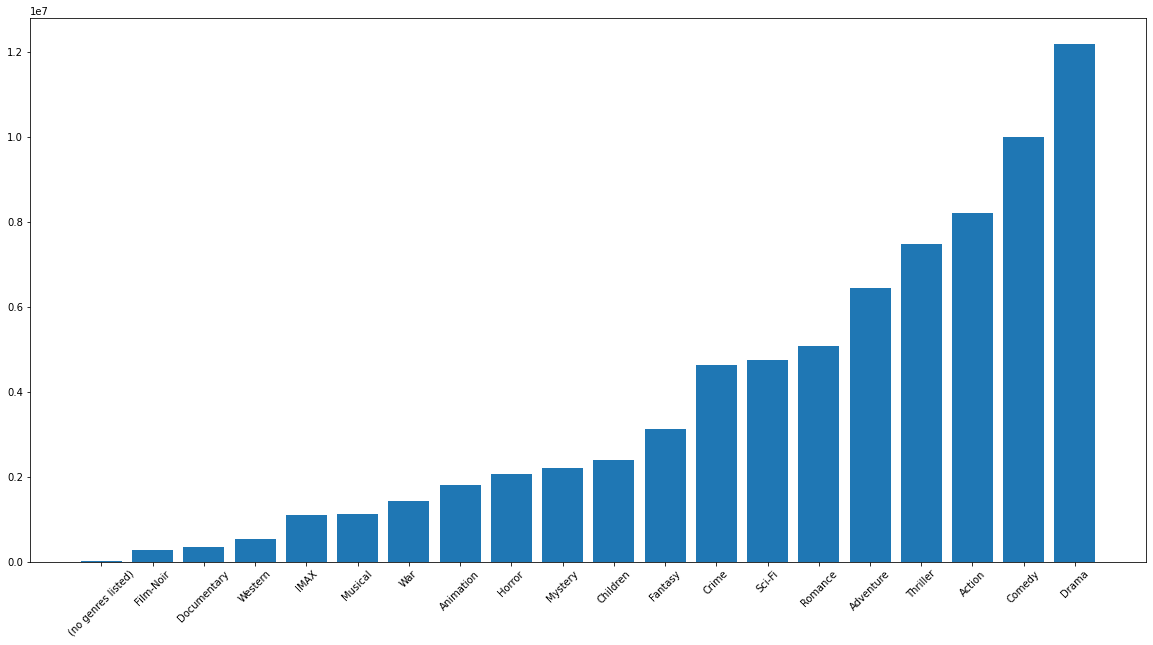

In [31]:
    # Create a bar plot
plt.figure(figsize=(20,10))
plt.bar(df_genres_split_grouped["genres"], df_genres_split_grouped["count"])
plt.xticks(rotation=45)
plt.show()

### Data describe

In [42]:
movie_ratings.describe().show()

+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|summary|           movieId|            userId|            rating|           timestamp|               title|            genres|
+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|  count|          27753444|          27753444|          27753444|            27753444|            27753444|          27753444|
|   mean| 18487.99983414671|141942.01557064414|3.5304452124932677|1.1931218549319255E9|                null|              null|
| stddev|35102.625247468335|   81707.400091494| 1.066352750231989|2.1604822852234188E8|                null|              null|
|    min|                 1|                 1|               0.5|           789652004|"""Great Performa...|(no genres listed)|
|    max|            193886|            283228|               5.0|          1537945149|     줄탁동시 (2012)|

Here we can see that we have 27 Millions of rows in our dataframe. Furthermore, we can observe that it has 193886 movies and 283228 different users. This lead as to conclude that we have possible nulls and/or the users just publish 100 ratings more or less.

In [48]:
df_genres_split.groupBy("genres").agg(avg("rating"), min("rating"), max("rating"), \
                                    stddev("rating"), stddev("rating")/avg("rating")) \
                                    .withColumnRenamed("(stddev_samp(rating) / avg(rating))", "Variation Coefficient") \
                                    .show()

+------------------+------------------+-----------+-----------+-------------------+---------------------+
|            genres|       avg(rating)|min(rating)|max(rating)|stddev_samp(rating)|Variation Coefficient|
+------------------+------------------+-----------+-----------+-------------------+---------------------+
|             Crime| 3.683522430029832|        0.5|        5.0| 1.0153457266291877|  0.27564532208399356|
|           Romance| 3.541861853098507|        0.5|        5.0| 1.0514365272045683|   0.2968598355367096|
|          Thriller|3.5188010672893233|        0.5|        5.0|  1.042630316405843|  0.29630271688220894|
|         Adventure|3.5132836167641694|        0.5|        5.0|  1.072788530508082|   0.3053521000664756|
|             Drama|3.6763707271105814|        0.5|        5.0| 1.0044495225847476|   0.2732176913437095|
|               War| 3.796596971345869|        0.5|        5.0| 0.9979888474744628|  0.26286404772658345|
|       Documentary|3.7108599564073397|       

Above, we can observe that the most rating genre is Film-Noirr with 3.8 on average, follow by War, Documentary, Crime and least Drama with 3.71, 3.68 and 3.67 on average. In addition to this, the min rating on all the genres is 0.5 and the max is 5 points that curious. Plus, the movie with the highest standard deviation are the `no genres listed` follow by Horror movies with 1.14. Due to this, the genred with the highest Variation coefficient are the `no genres listed` and `horror` movies. 

As we show before, Film-Noir is the genre with highest rating on average we will like to plot his distribution in order to know their behavior.

In [74]:
df_filmnoir = df_genres_split.filter(df_genres_split.genres == "Film-Noir").select("genres","rating").toPandas()

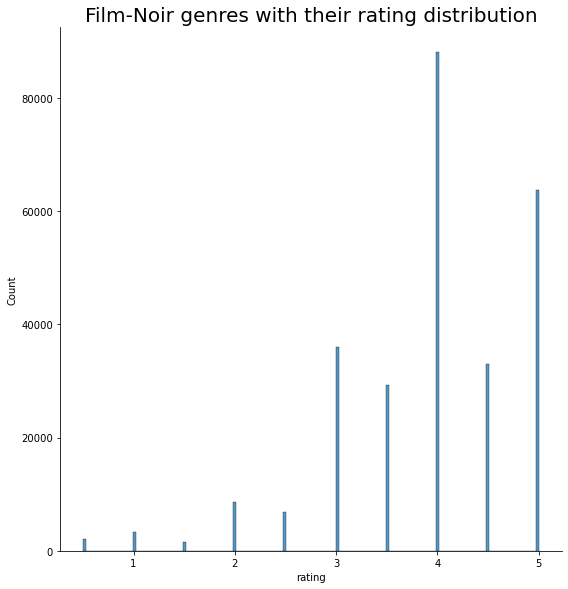

In [75]:
sns.displot(df_filmnoir, x="rating", height=8);
plt.title("Film-Noir genres with their rating distribution", fontsize=20);

We can observe that the majority of the ratings are very good (4 out of 5). Next, they don't have low ratings between 1 and 2. Finally, the distribution is concentrated between 3 and 5 so it has left-skewed.

Now, we will plot the worst genres rated to show the difference between Film-Noir movies and Horror movies.

Our initial hypothesis is the distribution will not change as much as the Film-Noir movies because on average they are actually similar

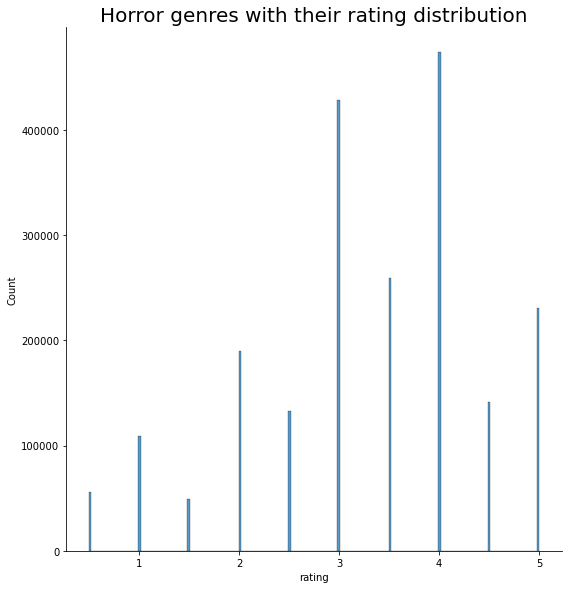

In [76]:
    # First we create the Pandas object
df_horror = df_genres_split.filter(df_genres_split.genres == "Horror").select("genres","rating").toPandas()

    # Finally we plot the horror movies
sns.displot(df_horror, x="rating", height=8);
plt.title("Horror genres with their rating distribution", fontsize=20);

As we said before, the majority of the distribution is in the range of 3 and 5 with more 3's than the Film-Noir movies. Plus, it has less 5's ratings and an increase in the lowest puntuation than the Film-Noir movies.

#### Box-plots by Genres

In [ ]:
# First we create the Pandas object
df_genres_rating = df_genres_split.select("genres","rating").toPandas()
df_genres_rating.head()
    # Finally we plot the horror movies
#sns.boxplot(data=df_genres_rating, x="genres", y="rating", height=8);
#plt.title("Boxplot by Genres", fontsize=20);

#### Most popular movies

To get the most popular movies, we are looking for the movies with the highest number of ratings (we use the number of ratings as a proxy for the number of views). To do this, we will perform the following transformations on the movie_ratings DataFrame:

- group by title

- count the number of users (userId) associated with each movie

- rename this column to num_ratings

- sort by num_ratings in descending order

In the next cell, we perform these transformations in pySpark and store the DataFrame as most_popular.

In [39]:
most_popular = movie_ratings\
    .groupBy("title")\
    .agg(count("userId"))\
    .withColumnRenamed("count(userId)", "num_ratings")\
    .sort(desc("num_ratings"))

The DataFrame methods we have used here are:

- groupBy - groups the DataFrame by the given column

- agg - allows us to perform an aggregate calculation on grouped data (this can be a built-in aggregation function such as count or a user defined function)

- withColumnRenamed - renames an existing column with a new column name

- sort - sorts by the specified column(s)

In [49]:
most_popular.show(10)

+--------------------+-----------+
|               title|num_ratings|
+--------------------+-----------+
|Shawshank Redempt...|      97999|
| Forrest Gump (1994)|      97040|
| Pulp Fiction (1994)|      92406|
|Silence of the La...|      87899|
|  Matrix, The (1999)|      84545|
|Star Wars: Episod...|      81815|
|Jurassic Park (1993)|      76451|
|Schindler's List ...|      71516|
|   Braveheart (1995)|      68803|
|    Toy Story (1995)|      68469|
+--------------------+-----------+
only showing top 10 rows



Here we can see the first 10 movies sorted by number of ratings. So, the most rating film is Shawshank Redemption follow by Forrest Gump one of the most famous films ever created.